In [ ]:
# Contains Static Model
# Making Predictions in format of table, Confusion Matrices, and Prediction Graphs

# Commented stuff: overall data transformation for static model

In [1]:
import fastf1 as f1
from pyergast import pyergast 

import pandas as pd
import numpy as np
import os 

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from datetime import datetime

import time 

In [2]:
# Load the data
complete_data = pd.read_csv("complete_data.csv")
complete_data_features = pd.read_csv("complete_data_features.csv")
complete_data_targets = pd.read_csv("complete_data_targets.csv")

In [3]:
active_constructors = ['Alpine F1 Team', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']

active_drivers = ['Daniel Ricciardo', 'Nikita Mazepin', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Mick Schumacher',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Fernando Alonso','Nicholas Latifi']

In [4]:
complete_data_features

,year,round,GP_name,quali_position,grid_position,constructor,driver,age_at_gp_in_days,wins_at_gp,podiums_at_gp,top10_at_gp,active_driver,active_constructor,position_at_previous_race,previous_finish_position_at_this_gp
0,2010,1,Bahrain International Circuit,9,9,Alpine F1 Team,Robert Kubica,9228,0,0,0,0,1,10,0
1,2010,1,Bahrain International Circuit,17,17,Alpine F1 Team,Vitaly Petrov,9318,0,0,0,0,1,0,0
2,2010,1,Bahrain International Circuit,11,11,Williams,Rubens Barrichello,13809,0,0,0,0,1,4,0
3,2010,1,Bahrain International Circuit,13,13,Williams,Nico Hülkenberg,8243,0,0,0,0,1,0,0
4,2010,1,Bahrain International Circuit,8,8,McLaren,Jenson Button,11012,0,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,2021,22,Abu Dhabi Grand Prix,4,4,Red Bull,Sergio Pérez,11643,2,15,132,1,1,17,20
5038,2021,22,Abu Dhabi Grand Prix,16,16,Williams,Nicholas Latifi,9663,0,0,2,1,1,12,17
5039,2021,22,Abu Dhabi Grand Prix,14,14,Alfa Romeo,Antonio Giovinazzi,10225,0,0,9,1,1,9,16
5040,2021,22,Abu Dhabi Grand Prix,17,17,Williams,George Russell,8701,0,1,5,1,1,19,15


In [5]:
# import math
# def fix_tyre(x):
    
#     if ((not math.isnan(x["Tyre Life"]))):
#         return x["Tyre Life"]
    
#     year = x["Year"]
#     gp_name = x["Grand Prix Name"]
#     round_number = x["Round Number"]
#     driver_number = x["Driver Name"]
#     lap = x["Lap"]
#     print("\ncurrent lap: ", lap)
    
#     prev_lap = dynamic_X[(dynamic_X["Year"]==year)&
#                          (dynamic_X["Grand Prix Name"]==gp_name)&
#                          (dynamic_X["Round Number"]==round_number)&
#                          (dynamic_X["Driver Name"]==driver_number)&
#                         (dynamic_X["Lap"]==(lap-1))]
    
#     print("next lap: {}".format(prev_lap["Lap"].iloc[0]))
#     return prev_lap["Tyre Life"].iloc[0] + 1

# dynamic_X["Tyre Life"] = dynamic_X.apply(fix_tyre,1)

In [6]:
# import math
# def fix_compound(x):
    
#     if (isinstance(x["Compound"], str)):
#         return x["Compound"]
    
#     year = x["Year"]
#     gp_name = x["Grand Prix Name"]
#     round_number = x["Round Number"]
#     driver_number = x["Driver Name"]
#     lap = x["Lap"]
#     print("\ncurrent lap: ", lap)
    
#     next_lap = dynamic_X[(dynamic_X["Year"]==year)&
#                          (dynamic_X["Grand Prix Name"]==gp_name)&
#                          (dynamic_X["Round Number"]==round_number)&
#                          (dynamic_X["Driver Name"]==driver_number)&
#                         (dynamic_X["Lap"]==(lap+2))]
    
#     print("next lap: {}".format(next_lap["Lap"].iloc[0]))
#     return (next_lap["Compound"].iloc[0])

# dynamic_X["Compound"] = dynamic_X.apply(fix_compound,1)

In [7]:
# dynamic_X["Year"] = dynamic_X["Year"].apply(lambda x: int(x))
# dynamic_X["Round Number"] = dynamic_X["Round Number"].apply(lambda x: int(x))
# dynamic_X["Lap"] = dynamic_X["Lap"].apply(lambda x: int(x))
# dynamic_X["PitStop"] = dynamic_X["PitStop"].apply(lambda x: int(x))
# dynamic_X["Wins"] = dynamic_X["Wins"].apply(lambda x: int(x))
# dynamic_X["Podiums"] = dynamic_X["Podiums"].apply(lambda x: int(x))
# dynamic_X["Points Finishes"] = dynamic_X["Points Finishes"].apply(lambda x: int(x))
# dynamic_X["Tyre Life"] = dynamic_X["Tyre Life"].apply(lambda x: int(x))
# dynamic_X["Quali"] = dynamic_X["Quali"].apply(lambda x: int(x))

# Don't run those

In [8]:
# complete_data['active_driver'] = complete_data['driver'].apply(lambda x: int(x in active_drivers))
# complete_data['active_constructor'] = complete_data['constructor'].apply(lambda x: int(x in active_constructors))

In [10]:
# def get_last_round(year,data):
#     season = data[data["year"]==year]
#     last_round = season["round"].max()
#     return last_round

# def find_position(row):
    
#     # return position from final race from previous race 
#     if (row["year"] == 2010)&(row["round"] == 1):
#         return 0
    
#     if row["round"] == 1:
        
#         prev_year = complete_data[(complete_data["year"] == (row["year"] - 1)) & (complete_data["driver"] == row["driver"])]
#         prev_season_last_round = get_last_round(row["year"],complete_data)
#         try:
#             return prev_year[prev_year["round"]==prev_season_last_round]["end_position"].iloc[0]
#         except:
#             return 0
            
#     try:
#         specific_driver = complete_data[(complete_data["year"] == row["year"])&(complete_data["driver"]==row["driver"])]
#         prev_round = specific_driver[specific_driver["round"] == row["round"]-1]["round"].iloc[0]
#         return specific_driver[specific_driver["round"]==prev_round]["end_position"].iloc[0]
#     except:
#         return 0
    
# complete_data["position_at_previous_race"] = complete_data.apply(find_position,axis=1)

In [11]:
# def find_position_prev_gp(row):
#     if (row["year"] == 2010)&(row["round"] == 1):
#         return 0
    
#     same_gp_diff_year = complete_data[(complete_data["driver"]==row["driver"]) & 
#                                     (complete_data["GP_name"]==row["GP_name"]) &
#                                     (complete_data["year"]<row["year"])
#                                    ]
#     prev_gp = same_gp_diff_year["year"].max()
#     try:
#         prev_position = same_gp_diff_year[same_gp_diff_year["year"]==prev_gp]["end_position"].iloc[0]
#     except: 
#         return 0
        
#     return prev_position

# complete_data["previous_finish_position_at_this_gp"] = complete_data.apply(find_position_prev_gp, axis=1)

# Cells below are for getting the complete => don't run it 

In [12]:
# def get_quali(x):
#     driver = x["driver"]
#     driver_row = quali_info[quali_info["driver"]==driver]
#     try:
#         quali_position = driver_row["position"].iloc[0]
#     except:
#         return
#     return quali_position

# def get_age(x):
#     driver_id = x["driverID"]
#     driver_dob = pd.to_datetime(drivers_info[drivers_info["driverId"]==driver_id]["dateOfBirth"].iloc[0])
#     gp_date = pd.to_datetime(x["date"])
    
#     return (abs(driver_dob - gp_date)).days

In [13]:
# idx=0
# for year in range(2020,2022):    
#     GPs = pyergast.get_schedule(year)
#     rounds = len(GPs)
    
#     for index in range(0,rounds):
        
#         # make sure we dont overuse API      
#         time.sleep(5)
#         print(index)
#         round_number= GPs["round"].iloc[index]

#         quali_info = pyergast.get_qualifying_result(year,round_number)[["driver","position"]]
#         race_info = pyergast.get_race_result(year, round_number)
#         drivers_info = pyergast.get_drivers(year)

#         combined_info = race_info[
#             [
#                 "position",
#                 "grid",
#                 "driver",
#                 "constructor",
#                 "driverID"
#             ]
#         ]
        
#         combined_info["quali_position"] = combined_info.apply(get_quali,axis=1)

#         combined_info = combined_info.rename(columns={
#             "position":"end_position",
#             "grid":"grid_position",

#         })

#         combined_info["year"] = year
#         combined_info["round"] = round_number
#         combined_info["GP_name"] = GPs["raceName"].iloc[index]
#         combined_info["date"] = GPs["date"].iloc[index]

#         combined_info = combined_info[[
#             "year",
#             "round",
#             "GP_name",
#             "quali_position",
#             "grid_position",
#             "constructor",
#             "driver",
#             "date",
#             "end_position",
#             "driverID"
#         ]]

#         combined_info["age_at_gp_in_days"] = combined_info.apply(get_age,axis=1)
        
#         if(idx>0):
#             combined_info = pd.concat([prev,combined_info],ignore_index=True)
            
#         idx+=1
#         prev = combined_info

# # Mick quali was None
# combined_info.iloc[437,3] = 20
# combined_info.to_csv("2020-2021.csv",index=False)

In [14]:
# combined_info = pd.read_csv("2020-2021.csv")
# combined_info = combined_info.sort_values(by=["year","round"], ascending=False)

# prev_info = pd.read_csv("features_all_years_all_drivers.csv")

# combined_info_targets = pd.DataFrame(combined_info["end_position"], columns=['end_position'])
# prev_info_targets = pd.read_csv("targets_all_years_all_drivers.csv")

In [15]:
# combined_info = combined_info.drop(["date","driverID","end_position"],1)

In [16]:
# all_info_features = pd.concat([combined_info,prev_info],ignore_index=True)
# all_info_targets = pd.concat([combined_info_targets,prev_info_targets],ignore_index=True)

In [17]:
# all_info_features.to_csv("complete_data_features.csv",index=False)
# all_info_targets.to_csv("complete_data_targets.csv",index=False)

# More data transformation 

In [18]:
# complete_data = complete_data.sort_values(by=["year","round"])

In [19]:
# def fill_dict(drivers):
#     for driver in drivers:
#         if driver not in drivers_dict.keys():
#             drivers_dict[driver] = {"wins":0,
#                                  "podiums":0,
#                                  "top10":0}
            
# def get_wins(x):
#     driver = x["driver"]
#     current_wins = drivers_dict[driver]["wins"]
    
#     if x["end_position"] == 1:
#         drivers_dict[driver]["wins"] += 1

#     return current_wins

# def get_podiums(x):
#     driver = x["driver"]
#     current_podiums = drivers_dict[driver]["podiums"]
    
#     if x["end_position"] < 4:
#         drivers_dict[driver]["podiums"] += 1
    
#     return current_podiums

# def get_top10(x):
#     driver = x["driver"]
#     current_top10 = drivers_dict[driver]["top10"]
    
#     if x["end_position"] < 11:
#         drivers_dict[driver]["top10"] += 1
    
    
#     return current_top10

In [20]:
# drivers_list = list(complete_data_features["driver"].unique())
# drivers_dict = {}

# fill_dict(drivers_list)

In [21]:
# complete_data["wins_at_gp"] = complete_data.apply(get_wins,axis=1)
# complete_data["podiums_at_gp"] = complete_data.apply(get_podiums,axis=1)
# complete_data["top10_at_gp"] = complete_data.apply(get_top10,axis=1)

In [22]:
# complete_data

In [5]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [6]:
X = complete_data_features
Y = complete_data_targets

In [7]:
# # Further data transformation - ALL DRIVERS
Y["end_position"] = Y["end_position"].apply(lambda x: position_index(x) )

# Encoding of non-integer variables
drivers_encoder = LabelEncoder()
GP_encoder = LabelEncoder()
constructors_encoder = LabelEncoder()
sc  = StandardScaler()

X['age_at_gp_in_days'] = sc.fit_transform(X[['age_at_gp_in_days']])
X["driver"] = drivers_encoder.fit_transform(X["driver"])
X["GP_name"] = GP_encoder.fit_transform(X["GP_name"])
X["constructor"] = constructors_encoder.fit_transform(X["constructor"])


In [8]:
test_GPs = {
#     #Japanese GP & Belgian GP
#     2010:[13,16],
    
#     # Singapore GP & German GP
#     2011:[10,14],
    
#     # Indian GP & Italian GP
#     2012:[13,17],
    
#     # Canadian GP & Indian GP
#     2013:[7,16],
    
#     # Spanish GP & Australian GP
#     2014:[1,5],
    
#     # British GP & Hungarian GP
#     2015:[9,10],
    
#     # Mexican GP & Spanish GP
#     2016:[5,19],
    
#     # Bahrain GP & Mexican GP
#     2017:[3,18],
    
    # Hungarian GP & Chinese GP
    2018:[3,12],
    
    # French GP & German GP
    2019:[8,11],
    
    # Portugal GP & Italian GP
    2020:[8,12],
    
    # Belgian GP
    2021:[12, 22]
}

counter = 0
idx_to_drop = []

for year in test_GPs.keys():
    idx = []
    for round_number in test_GPs[year]:
        idx += X[(X["year"]==year)&(X["round"]==round_number)].sort_values(by=["grid_position"]).index.values.tolist() 

    idx_to_drop += idx
    
    X_race = X.iloc[idx]
 
    if (counter>0):
        X_race = pd.concat([X_test, X_race])
        
    X_test = X_race
    counter+=1

X_train =  X.drop(idx_to_drop)

Y_test = Y.iloc[idx_to_drop]
Y_train =  Y.drop(idx_to_drop)

utils          INFO 	NumExpr defaulting to 4 threads.


In [9]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [10]:
# Save the dimension of our data (number of columns)
our_input_dim = len(X.columns)

encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)

# convert integers to dummy variables (i.e. one hot encoded)
one_hot_y = np_utils.to_categorical(encoded_Y)

# Number of classes (number of posistions)
n_classes = one_hot_y.shape[1]

# Classes
classes = [i for i in range(1,n_classes+1)]

C:\Users\Michauu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
n_classes

3

In [12]:
one_hot_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [13]:
# opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = keras.optimizers.Adam(learning_rate=0.001)

checkpoint_filepath = os.getcwd()
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

opt =  keras.optimizers.Adamax(learning_rate=0.005) 

# Create model
model = Sequential()

model.add(Dense(64, input_dim=our_input_dim, activation='LeakyReLU'))
model.add(Dropout(0.05))
model.add(BatchNormalization())

model.add(Dense(32, activation='LeakyReLU'))
model.add(Dropout(0.01))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

# Compile model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['CategoricalAccuracy'])

history = model.fit(
    X_train,
    one_hot_y,
    validation_split=0.25,
    batch_size=32,
    epochs=100,
    verbose=1,
    callbacks=[model_checkpoint_callback])

Epoch 1/100
115/115 [==============================] - 1s 4ms/step - loss: 0.9050 - categorical_accuracy: 0.5849 - val_loss: 0.9498 - val_categorical_accuracy: 0.5209
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7371 - categorical_accuracy: 0.6477 - val_loss: 0.7764 - val_categorical_accuracy: 0.6224
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7217 - categorical_accuracy: 0.6567 - val_loss: 0.9168 - val_categorical_accuracy: 0.5799
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7119 - categorical_accuracy: 0.6606 - val_loss: 0.7335 - val_categorical_accuracy: 0.6609
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6974 - categorical_accuracy: 0.6663 - val_loss: 0.7588 - val_categorical_accuracy: 0.6585
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7038 - categorical_accuracy: 0.6633 - val_loss: 0.7657 - val_categorical_accuracy: 0.662

Epoch 50/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6536 - categorical_accuracy: 0.6950 - val_loss: 0.6853 - val_categorical_accuracy: 0.6888
Epoch 51/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6505 - categorical_accuracy: 0.7010 - val_loss: 0.7970 - val_categorical_accuracy: 0.6347
Epoch 52/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6623 - categorical_accuracy: 0.6958 - val_loss: 0.7990 - val_categorical_accuracy: 0.6069
Epoch 53/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6547 - categorical_accuracy: 0.6903 - val_loss: 0.6906 - val_categorical_accuracy: 0.6773
Epoch 54/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6547 - categorical_accuracy: 0.6881 - val_loss: 0.7175 - val_categorical_accuracy: 0.6806
Epoch 55/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6486 - categorical_accuracy: 0.6917 - val_loss: 0.7477 - val_categorical_accuracy:

Epoch 99/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6453 - categorical_accuracy: 0.6936 - val_loss: 0.8312 - val_categorical_accuracy: 0.5921
Epoch 100/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6403 - categorical_accuracy: 0.6996 - val_loss: 0.6845 - val_categorical_accuracy: 0.6921


In [14]:
print(history.history['val_categorical_accuracy'][-1])
print(history.history['categorical_accuracy'][-1])
print(history.history['val_loss'][-1])
print(history.history['loss'][-1])

0.6920557022094727
0.6996176838874817
0.6845190525054932
0.640273928642273


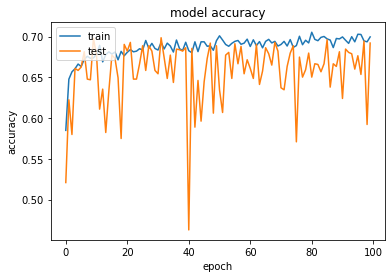

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

# Testing and plotting the results

In [17]:
def get_w_avg(preds):
    preds_transformed = []
    for pred in preds:
        term = 0
        for index, weight in enumerate(pred):
            current_term = weight * (index+1)
            term = term + current_term
        preds_transformed.append(term)
    return preds_transformed

def to_classes(one_hot_matrix_preds):
    return (one_hot_matrix_preds + 1)

In [18]:
# Get the probabilities
predictions = model.predict(X_test)

# Get the predictions
predicted_class = to_classes(np.argmax(predictions,axis=1))

# Get the averaged position
avg_class = get_w_avg(predictions)

In [19]:
pred_dict = {}
for index,pred in enumerate(predictions): 
    pred_dict[Y_test.iloc[index].name] = list(pred)

In [20]:
Y_test["Predicted position"] = predicted_class
Y_test["Expectation Value"] = avg_class
Y_test["Correctness"] = Y_test["Predicted position"] == Y_test["end_position"]

X_test["GP_name"] = GP_encoder.inverse_transform(X_test["GP_name"])
X_test["driver"] = drivers_encoder.inverse_transform(X_test["driver"])
X_test["constructor"] = constructors_encoder.inverse_transform(X_test["constructor"])

Predictions_results = pd.concat([X_test,Y_test],axis=1)

Predictions_results["difference"] = Predictions_results["end_position"] - Predictions_results["Predicted position"]

<ipython-input-20-b4ad839b6a87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test["Predicted position"] = predicted_class
<ipython-input-20-b4ad839b6a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test["Expectation Value"] = avg_class
<ipython-input-20-b4ad839b6a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.6)
cm = confusion_matrix(list(Y_test["end_position"]), predicted_class)
cm_df = pd.DataFrame(cm,
                     index = [str(i) for i in range(1,n_classes+1)], 
                     columns = [str(i) for i in range(1,n_classes+1)])

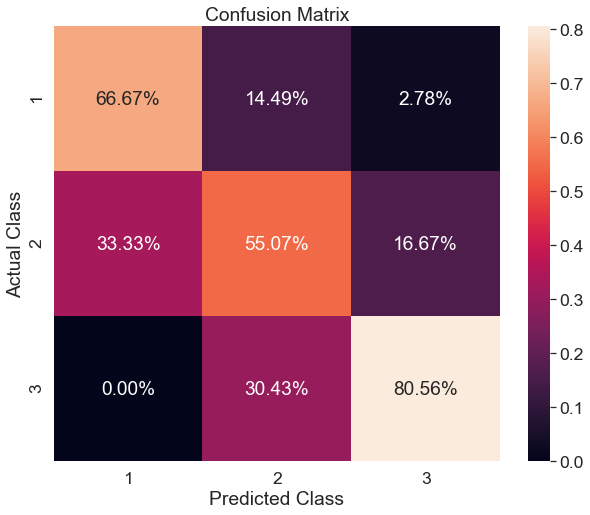

In [22]:
#Plotting a confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
#Normalize, give as fraction

In [26]:
drivers = Predictions_results["driver"].unique()

for driver in drivers:
    df = Predictions_results[Predictions_results["driver"]==driver]
    print(df)
    for index, race in df.iterrows():
        print(race)

      year  round                       GP_name  quali_position  \
308   2010     13  Circuit de Spa-Francorchamps               1   
380   2010     16                Suzuka Circuit               2   
690   2011     10                   N�rburgring               1   
785   2011     14     Marina Bay Street Circuit               2   
1209  2012     13  Autodromo Nazionale di Monza              11   
1304  2012     17   Buddh International Circuit               2   
1532  2013      7     Circuit Gilles Villeneuve               5   
1730  2013     16   Buddh International Circuit               4   

      grid_position constructor       driver  age_at_gp_in_days  wins_at_gp  \
308               1    Red Bull  Mark Webber           1.158515           4   
380               2    Red Bull  Mark Webber           1.180499           4   
690               1    Red Bull  Mark Webber           1.330719           4   
785               2    Red Bull  Mark Webber           1.363694           4   
1

Name: 300, dtype: object
year                                             2010
round                                              16
GP_name                                Suzuka Circuit
quali_position                                      7
grid_position                                       6
constructor                                  Mercedes
driver                                   Nico Rosberg
age_at_gp_in_days                           -0.508042
wins_at_gp                                          0
podiums_at_gp                                       3
top10_at_gp                                        13
active_driver                                       0
active_constructor                                  1
position_at_previous_race                           5
previous_finish_position_at_this_gp                 0
end_position                                       17
Predicted position                                  5
Expectation Value                            10.87519
Cor

Name: 4840, dtype: object
year                                                   2021
round                                                    22
GP_name                                Abu Dhabi Grand Prix
quali_position                                           18
grid_position                                            18
constructor                                      Alfa Romeo
driver                                       Kimi Räikkönen
age_at_gp_in_days                                  2.716725
wins_at_gp                                                3
podiums_at_gp                                            41
top10_at_gp                                             125
active_driver                                             1
active_constructor                                        1
position_at_previous_race                                15
previous_finish_position_at_this_gp                      12
end_position                                             19
Predicted posi

      year  round                         GP_name  quali_position  \
2370  2015      9             Silverstone Circuit               8   
2390  2015     10                     Hungaroring              12   
2670  2016      5  Circuit de Barcelona-Catalunya               8   
2973  2016     19    Aut�dromo Hermanos Rodr�guez              10   
3079  2017      3   Bahrain International Circuit              16   
3368  2017     18    Aut�dromo Hermanos Rodr�guez               9   
3467  2018      3  Shanghai International Circuit               9   
3647  2018     12                     Hungaroring               5   
3988  2019      8             Circuit Paul Ricard               6   
4048  2019     11                  Hockenheimring               7   
4404  2020      8              Italian Grand Prix               3   
4488  2020     12           Portuguese Grand Prix               7   
4832  2021     12              Belgian Grand Prix              13   
5025  2021     22            Abu D

5040           1  
year                                                  2019
round                                                    8
GP_name                                Circuit Paul Ricard
quali_position                                          19
grid_position                                           20
constructor                                       Williams
driver                                      George Russell
age_at_gp_in_days                                -1.260715
wins_at_gp                                               0
podiums_at_gp                                            0
top10_at_gp                                              0
active_driver                                            1
active_constructor                                       1
position_at_previous_race                               16
previous_finish_position_at_this_gp                      0
end_position                                            19
Predicted position                   

In [ ]:
# pd.set_option("display.max_rows",None)
# X_test

In [27]:
race_names = list(Predictions_results["GP_name"].unique())
years = list(test_GPs.keys())

# Saves (doesn't display!) a graph contating predictions for each driver of a race (takes few minutes to finish)
for year in years:
    for round_number in test_GPs[year]:
        print(f"year: {year}, round: {round}")
        driver_list = Predictions_results[(Predictions_results["year"]==year)&(Predictions_results["round"]==round_number)]
        
        # Decide how many subplots - in older races there were more drivers => more subplots         
        if((len(driver_list)) < 21 ):
            fig, ax = plt.subplots(4,5, figsize = (60,30))
        elif((len(driver_list)) > 20 ):
            fig, ax = plt.subplots(4,6, figsize = (60,30))
            
        fig.suptitle(f"Predictions for {year}, round {round_number} \nRace: {driver_list.iloc[0].GP_name}", fontsize=60)

        for count, item in enumerate(ax.reshape(-1)):
            
            try:
                
                # Probabilities for each position                 
                probs = list(pred_dict[driver_list.iloc[count].name])
                
                # Expectation value line                  
                y_top=max(probs)
                exp_value = driver_list.iloc[count]["Expectation Value"]
                
                # For bar colors                  
                actual_position = driver_list.iloc[count]["end_position"]
                predicted_position = driver_list.iloc[count]["Predicted position"]
                colors = ["red" if (value==actual_position) else "gray" for i,value in enumerate(classes)]
                
            except:
                continue
                
            # Plot bars and line              
            item.bar(classes,probs,color=colors)
            item.plot([exp_value,exp_value],[0,y_top],'o--y', linewidth=3)
            item.set_xticks(classes)
            
            item.text(exp_value,y_top, f"Expectation Value={round(exp_value,2)}",horizontalalignment='center',fontweight='bold')
            item.set_title(f"{driver_list.iloc[count].driver} \n Actual finishing position: {driver_list.iloc[count].end_position} (shown in red)", fontsize=20)
            
            
            fig.text(0.5, 0.05, 'End position', ha='center', va='center',size=60)
            fig.text(0.08, 0.5, 'Probability', ha='center', va='center', rotation='vertical',size=60)
        
        plt.savefig(f"predictions_{year}_{round_number}.jpg")
        plt.close()


year: 2010, round: <built-in function round>
year: 2010, round: <built-in function round>
year: 2011, round: <built-in function round>
year: 2011, round: <built-in function round>
year: 2012, round: <built-in function round>
year: 2012, round: <built-in function round>
year: 2013, round: <built-in function round>
year: 2013, round: <built-in function round>
year: 2014, round: <built-in function round>
year: 2014, round: <built-in function round>
year: 2015, round: <built-in function round>
year: 2015, round: <built-in function round>
year: 2016, round: <built-in function round>
year: 2016, round: <built-in function round>
year: 2017, round: <built-in function round>
year: 2017, round: <built-in function round>
year: 2018, round: <built-in function round>
year: 2018, round: <built-in function round>
year: 2019, round: <built-in function round>
year: 2019, round: <built-in function round>
year: 2020, round: <built-in function round>
year: 2020, round: <built-in function round>
year: 2021